## Childcare Cost Analysis

### Project Overview: 
This project examines the affordability of childcare across the United States, with a special focus on infant care costs. Using national childcare cost data, the study analyzes key trends, regional disparities, and economic impacts affecting families.

Through data visualization techniques such as Power BI dashboards, infographics, and presentations, the project highlights:

* Cost trends over time and inflation-adjusted increases.
* Regional disparities in childcare expenses.
* Income-based affordability challenges and their impact on families.
* Demographic insights to understand who is most affected.

The findings aim to provide a data-driven perspective to inform policymakers, families, and researchers on the growing financial burden of childcare.

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
childcare_df = pd.read_excel("../dataset/nationaldatabaseofchildcareprices.xlsx")

# Display the first few rows 
childcare_df.head()

State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  MFCCToddler  \
0    5.42     4.41     6.32         4.6          3.5  ...        83.45   
1    5.93     5.72     6.11         4.8          4.6  ...        87.39   
2    6.21     5.57     6.78         5.1          4.6  ...        91.33   
3    7.55     8.13     7.03         6.2          6.3  ...        95.28   
4    8.60     8.88     8.29         6.7          6.4  ...        99.22   

   MFCCToddler_flag  MFCCPreschool  MFCCPreschool_flag  _75FCCInfant  \
0               3.0          81.40                 1.0          97.4   
1               3.0          85.68                 1.0         102.0   
2               3.0          89.96                 1.0         106.6   
3               3.0          94.25                 1.0         111.2   
4               3.0          98.53                 1.0         115.8   

   _75FCCInfant_flag  _75FCCToddler  _75FCCToddler_flag  _75FCCPreschool  \
0                1.0           97.4                 3.0             95.0   
1                1.0          102.0                 3.0            100.0   
2                1.0          106.6                 3.0            105.0   
3                1.0          111.2                 3.0            110.0   
4                1.0          115.8                 3.0            115.0   

   _75FCCPreschool_flag  
0                   1.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0  

[5 rows x 227 columns]

Explore the dataset to identify key columns and their meanings. Use the technical guide provided with the dataset to 
understand what each field represents.

In [3]:
# Convert StudyYear to datetime 
childcare_df['StudyYear'] = pd.to_datetime(childcare_df['StudyYear'], format='%Y')

# Display data types
print(childcare_df.info())

# Summary statistics
print(childcare_df.describe())

# Check for missing values
print(childcare_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Columns: 227 entries, State_Name to _75FCCPreschool_flag
dtypes: datetime64[ns](1), float64(159), int64(64), object(3)
memory usage: 59.9+ MB
None
       County_FIPS_Code                      StudyYear        UNR_16  \
count      34567.000000                          34567  34567.000000   
mean       30388.132786  2012-12-31 12:44:13.212601600      7.465902   
min         1001.000000            2008-01-01 00:00:00      0.000000   
25%        18177.000000            2010-01-01 00:00:00      5.100000   
50%        29177.000000            2013-01-01 00:00:00      7.050000   
75%        45081.000000            2016-01-01 00:00:00      9.350000   
max        56045.000000            2018-01-01 00:00:00     36.110000   
std        15161.015383                            NaN      3.538619   

           FUNR_16       MUNR_16    UNR_20to64   FUNR_20to64   MUNR_20to64  \
count  34567.00000  34567.000000  34567.000000  34

## Perform Basic Exploratory Data Analysis (EDA)
### Analyze Price Data
Childcare price trends can be analyzed across various dimensions like state, type of childcare service, or year. In this analysis, I will compute center and home  based childcare price by state

In [4]:
# Average weekly center and home  based childcare price by state -- for selcted variables
avg_price_by_state = childcare_df.groupby('State_Name')[['MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCCSA', 
                                                       'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']].mean()
print(avg_price_by_state)


                      MFCCInfant  MFCCToddler  MFCCPreschool      MFCCSA  \
State_Name                                                                 
Alabama                91.819281    92.003636      90.462157   89.283555   
Alaska                175.299333   156.849333     146.000667  125.676000   
Arizona               113.246667   110.052667     105.432970  101.800485   
Arkansas               90.583333    86.166667      82.543867   79.377200   
California            173.336489   160.905408     160.905408  137.847085   
Colorado              169.735938   157.000000     149.145312  132.957188   
Connecticut           186.534091   184.761364     177.213182   83.304091   
Delaware              129.484242   124.341515     117.997576   59.375152   
District of Columbia  215.770000   200.340000     192.800000  172.340000   
Florida               126.643829   115.122041     107.921440   92.467911   
Georgia                94.528302    93.647799      93.207547   89.937107   
Hawaii      

### Trend Analysis of Childcare Costs
In this section I tried to show the overall trend analyisis how childcare costs for  School 
Age, toddlers, preschoolers, and infants have changed over time, both at the Home based and center based child cares.

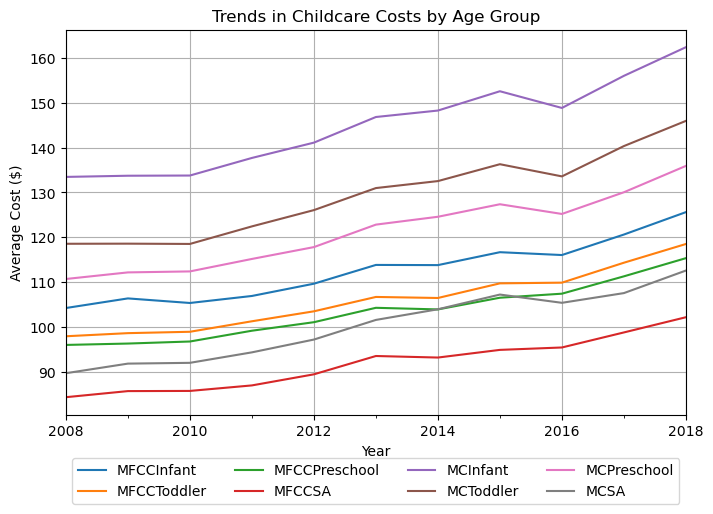

In [10]:
# Group by year and calculate average costs
avg_costs = childcare_df.groupby('StudyYear')[['MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCCSA', 
                                                       'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']].mean()

# Plot the trends
avg_costs.plot(figsize=(8, 5))
plt.title('Trends in Childcare Costs by Age Group')
plt.ylabel('Average Cost ($)')
plt.xlabel('Year')
plt.legend(['MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCCSA', 
            'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA'], loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=4)
plt.grid()
plt.show()

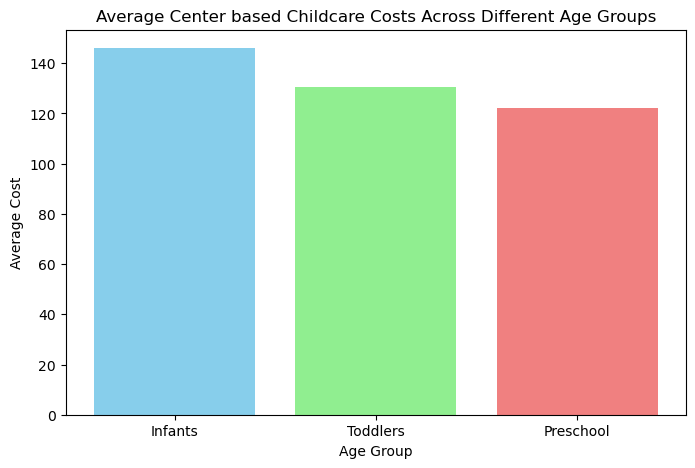

In [11]:
# Calculate the average childcare cost for each age group
age_groups = ['Infants', 'Toddlers', 'Preschool']
average_costs = [
    childcare_df['MCInfant'].mean(), 
    childcare_df['MCToddler'].mean(), 
    childcare_df['MCPreschool'].mean()
]

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(age_groups, average_costs, color=['skyblue', 'lightgreen', 'lightcoral'])

# Add labels and title
plt.title('Average Center based Childcare Costs Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Cost')

# Show the plot
plt.show()

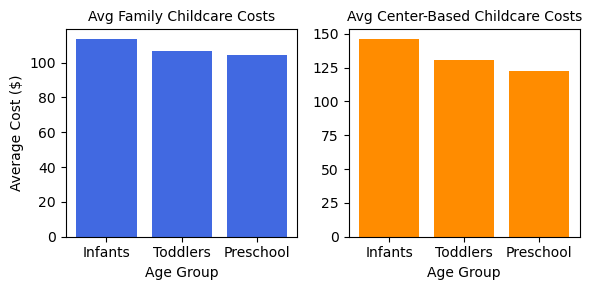

In [18]:
# Define age groups
age_groups = ['Infants', 'Toddlers', 'Preschool']

# Calculate average childcare costs
average_costs = [
    childcare_df['MFCCInfant'].mean(), 
    childcare_df['MFCCToddler'].mean(), 
    childcare_df['MFCCPreschool'].mean()
]

cent_average_costs = [
    childcare_df['MCInfant'].mean(), 
    childcare_df['MCToddler'].mean(), 
    childcare_df['MCPreschool'].mean()
]

# Create subplots for side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

# First subplot - Family Childcare Costs
axes[0].bar(age_groups, average_costs, color='royalblue')
axes[0].set_title('Avg Family Childcare Costs', fontsize=10)
axes[0].set_xlabel('Age Group', fontsize=10)
axes[0].set_ylabel('Average Cost ($)')

# Second subplot - Center-Based Childcare Costs
axes[1].bar(age_groups, cent_average_costs, color='darkorange')
axes[1].set_title('Avg Center-Based Childcare Costs', fontsize=10)
axes[1].set_xlabel('Age Group', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


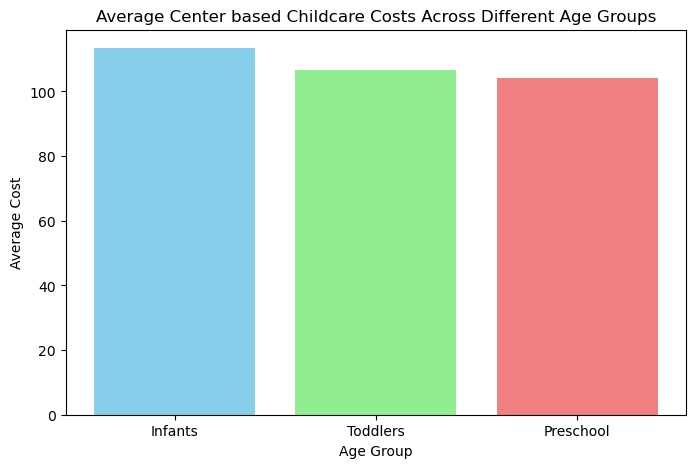

In [19]:
# Calculate the average childcare cost for each age group
age_groups = ['Infants', 'Toddlers', 'Preschool']
average_costs = [
    childcare_df['MFCCInfant'].mean(), 
    childcare_df['MFCCToddler'].mean(), 
    childcare_df['MFCCPreschool'].mean()
]


# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(age_groups, average_costs, color=['skyblue', 'lightgreen', 'lightcoral'])

# Add labels and title
plt.title('Average Center based Childcare Costs Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Cost')

# Show the plot
plt.show()

Interpretation: 
* The overall trend for all age groups is an increase in childcare costs over time. When we see each category, infant care is consistently the most expensive type of childcare. On the other hand, school-age care is generally the least expensive type of childcare.

In [20]:
print(childcare_df.columns)

Index(['State_Name', 'State_Abbreviation', 'County_Name', 'County_FIPS_Code',
       'StudyYear', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64',
       'FUNR_20to64',
       ...
       'MFCCToddler', 'MFCCToddler_flag', 'MFCCPreschool',
       'MFCCPreschool_flag', '_75FCCInfant', '_75FCCInfant_flag',
       '_75FCCToddler', '_75FCCToddler_flag', '_75FCCPreschool',
       '_75FCCPreschool_flag'],
      dtype='object', length=227)


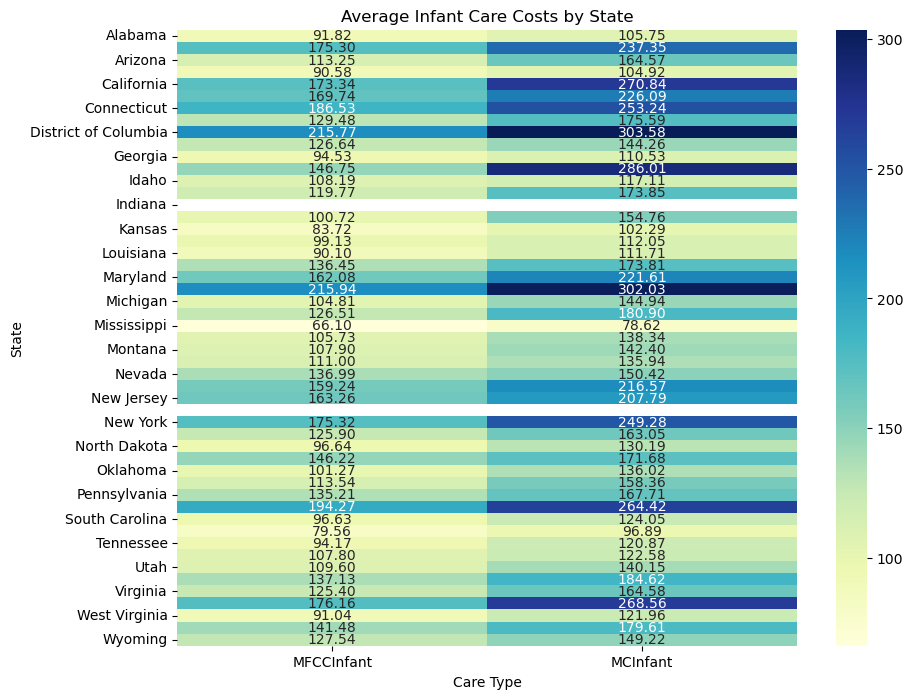

In [21]:
# Group by state and calculate average costs
avg_infant_care_costs = childcare_df.groupby('State_Name')[['MFCCInfant', 'MCInfant']].mean()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(avg_infant_care_costs, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

plt.title("Average Infant Care Costs by State")
plt.ylabel("State")
plt.xlabel("Care Type")
plt.show()


### Unemployment Rate and Childcare Cost Correlation
This analysis shows how unemployment rates  correlate with childcare costs.

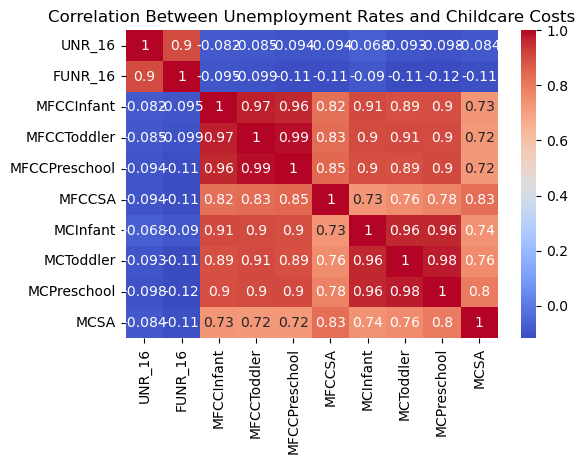

In [22]:
# Select columns
correlation_data = childcare_df[['UNR_16', 'FUNR_16', 'MFCCInfant', 'MFCCToddler', 'MFCCPreschool', 'MFCCSA', 
                        'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']]

# Calculate correlation
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Unemployment Rates and Childcare Costs')
plt.show()


Interpretation:
* Childcare costs for different age groups (Infant, Toddler, Preschool, and School-Age) are highly correlated with each other. This suggests that factors affecting the cost of one type of childcare likely impact the others as well.
* There is a moderate positive correlation between unemployment rates (UNR_16 and FUNR_16) and childcare costs. This might indicate that when unemployment rates are higher, childcare costs tend to be lower, possibly due to decreased demand or increased supply of childcare workers.
* There are also weak negative correlations between unemployment rates and childcare costs. This suggests that as unemployment rates increase, childcare costs tend to decrease slightly.

### Regional Cost Analysis
In this analysis, I tried to compare median childcare costs across states.

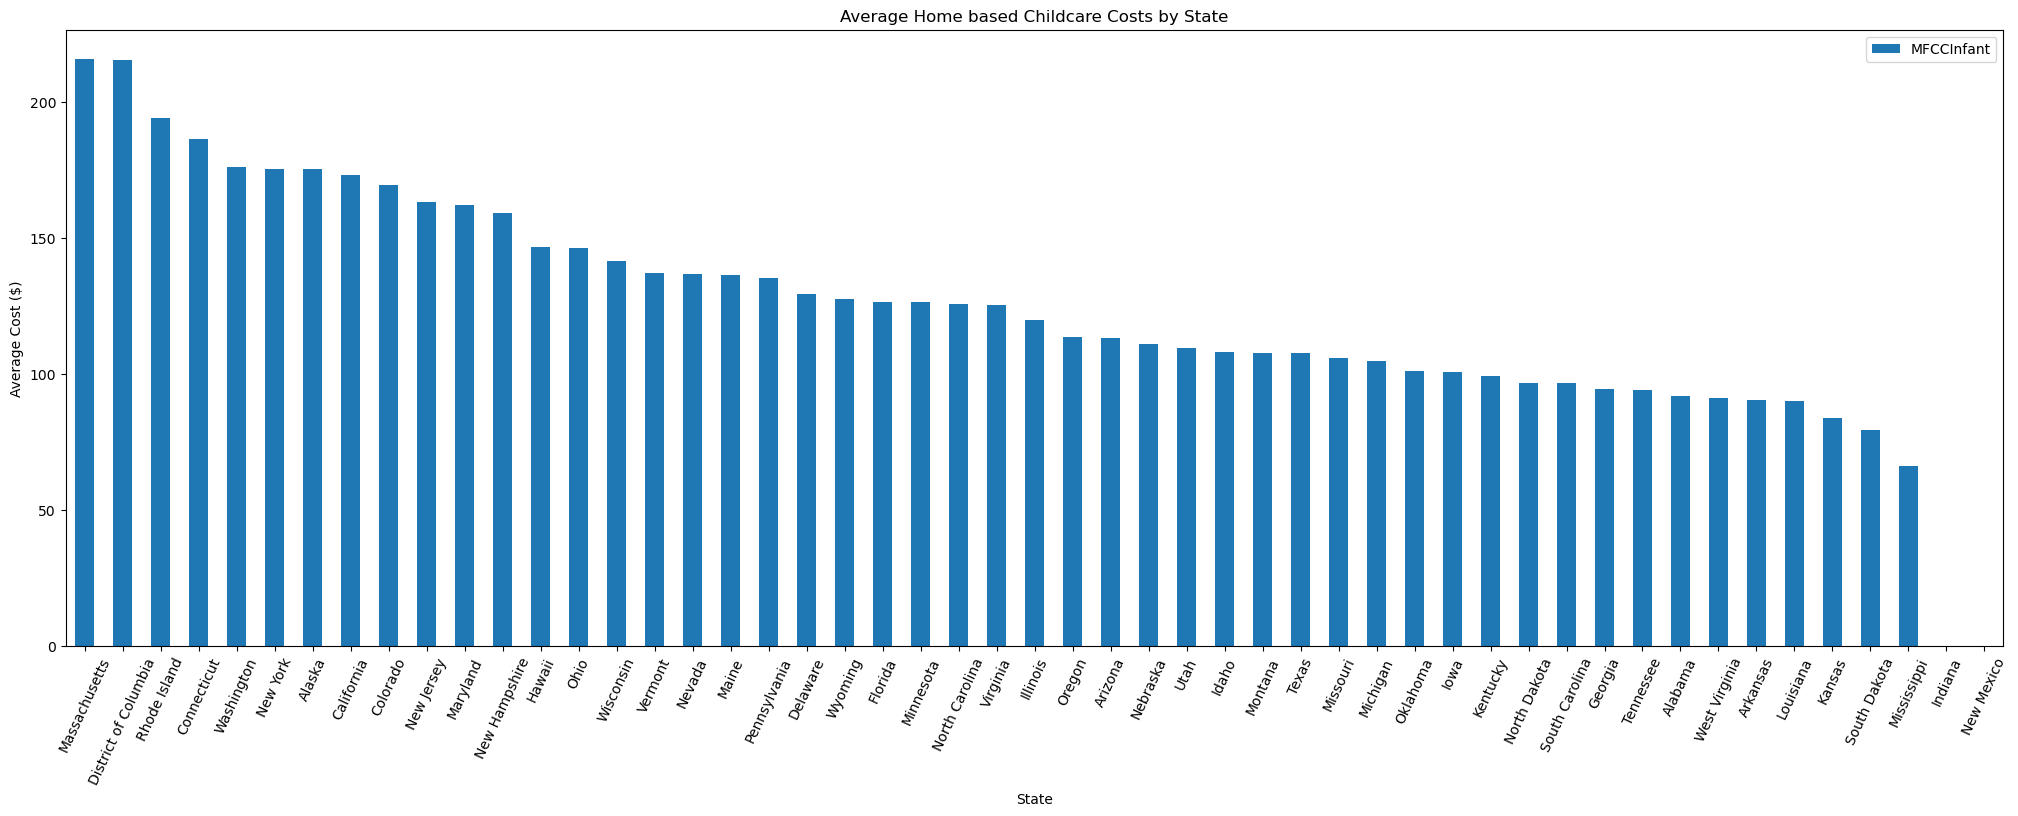

In [23]:
# Average childcare costs by state
state_costs_fam = childcare_df.groupby('State_Name')[['MFCCInfant']].mean()
state_costs_cen = childcare_df.groupby('State_Name')[['MCInfant']].mean()

# Bar plot
state_costs_fam.sort_values('MFCCInfant', ascending=False).plot(kind='bar', figsize=(25, 8))
plt.title('Average Home based Childcare Costs by State')
plt.ylabel('Average Cost ($)')
plt.xlabel('State')
plt.xticks(rotation=65)
plt.show()

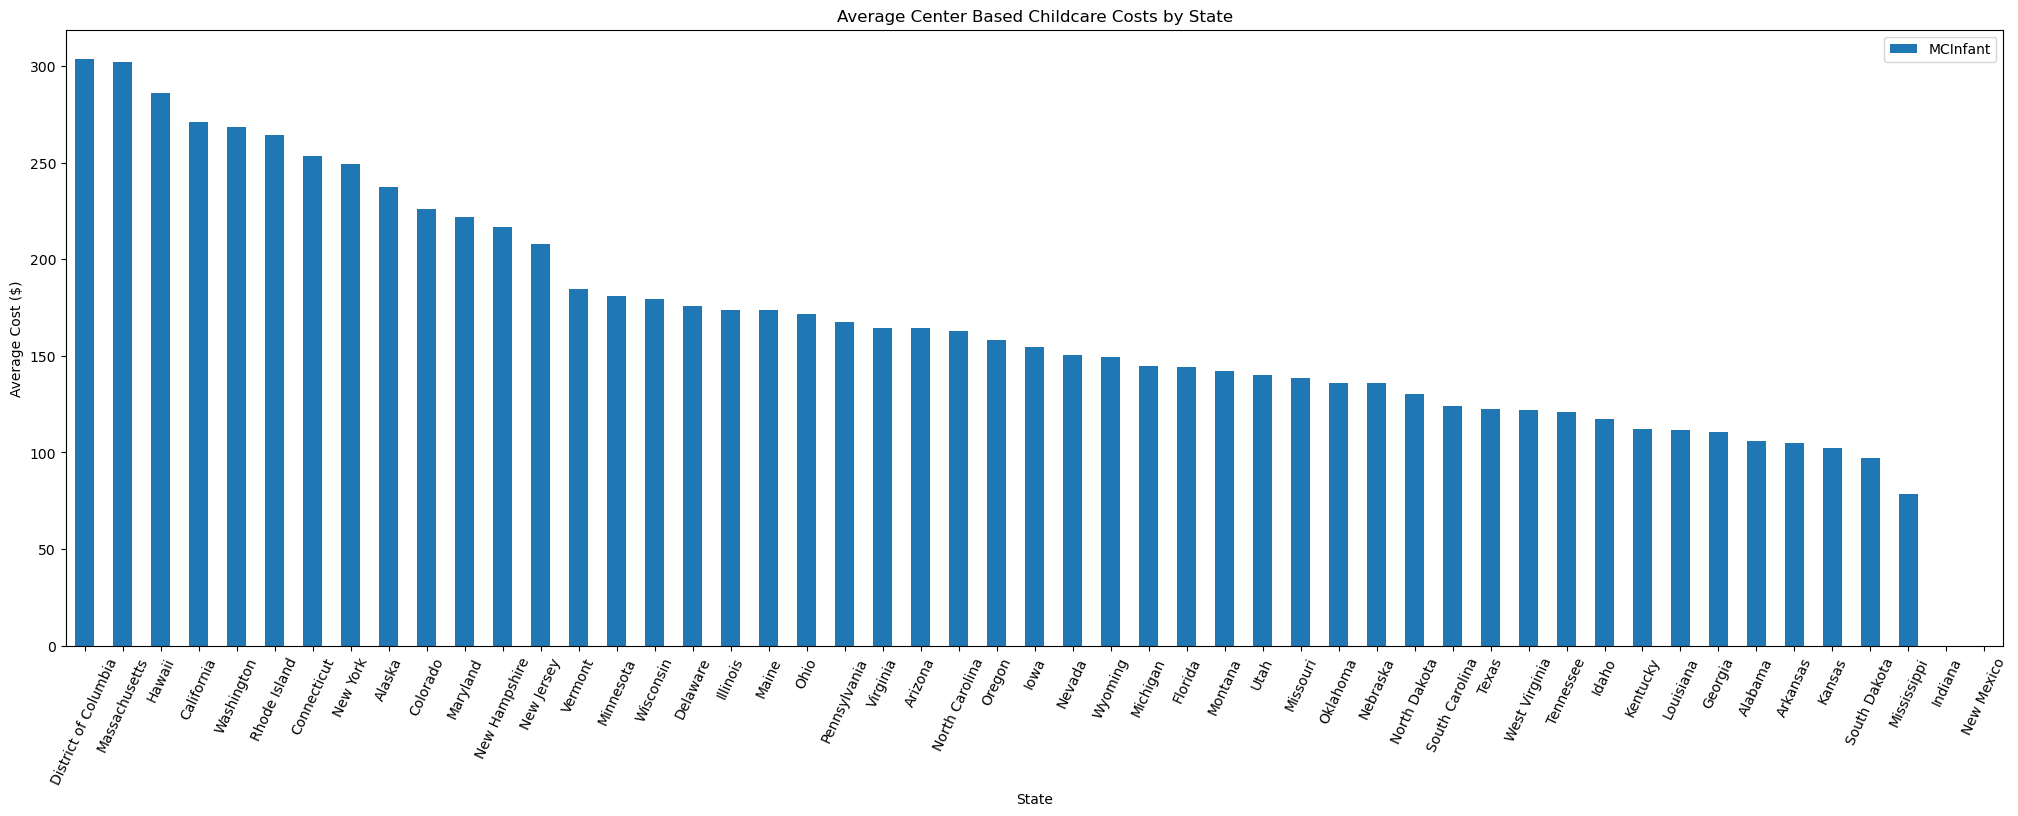

In [24]:
# Bar plot
state_costs_cen.sort_values('MCInfant', ascending=False).plot(kind='bar', figsize=(25, 8))
plt.title('Average Center Based Childcare Costs by State')
plt.ylabel('Average Cost ($)')
plt.xlabel('State')
plt.xticks(rotation=65)
# plt.legend(['MCInfant', 'MCToddler', 'MCPreschool', 'MCSA'])
# Set font size for title and labels
plt.rcParams.update({'font.size': 14})
plt.show()

Intepretation:
* The graph shows in center based childcares, infant care is generally the most expensive, followed by toddler care, preschool, and school-age care.
* Other key observations, Hawaii and Massachusetts have higher center based childcares costs across all age groups, while others, like Mississippi and South Dakota, tend to have lower costs.

### Affordability
Here I calculate childcare costs as a percentage of median income to indicate the affordability index using household income information. 

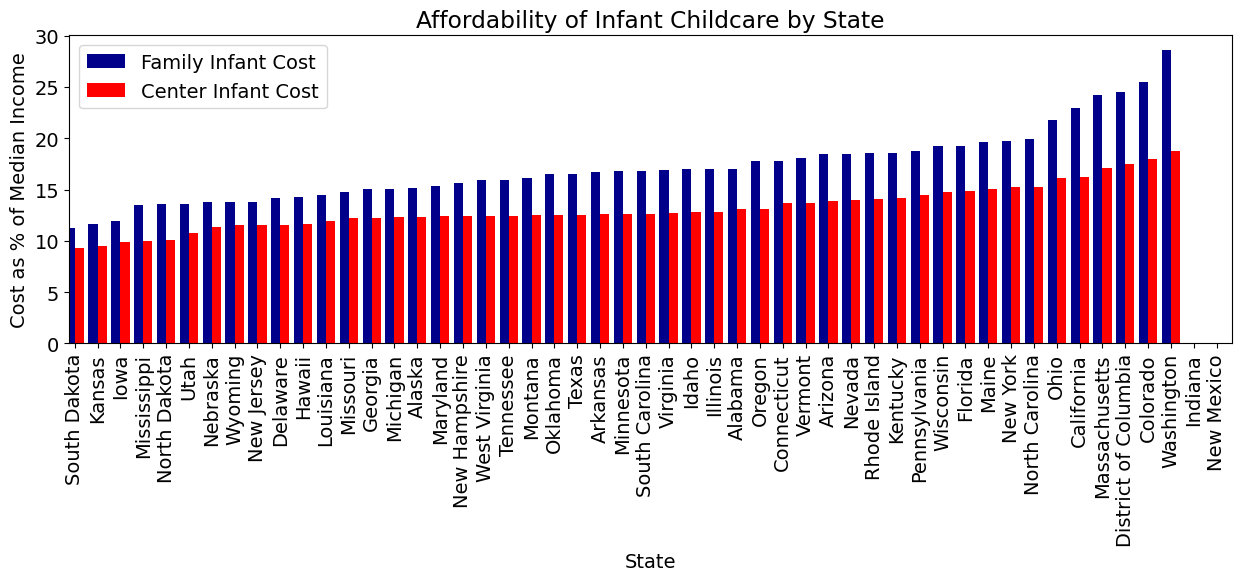

In [25]:
# Calculate affordability indexes and create new columns
childcare_df['Center_Infant_Cost_Percentage'] = (
    (childcare_df['MCInfant'] * 52 / childcare_df['MHI']) * 100
).round(2) 
childcare_df['Fam_Infant_Cost_Percentage'] = (childcare_df['MFCCInfant'] * 52 / childcare_df['MHI']) * 100

# Group by state and calculate the mean
fam_affordability = childcare_df.groupby('State_Name')['Center_Infant_Cost_Percentage'].mean()
Center_affordability = childcare_df.groupby('State_Name')['Fam_Infant_Cost_Percentage'].mean()

# Plot
fig, ax = plt.subplots(figsize=(15, 4))
fam_affordability.sort_values().plot(kind='bar', color='darkblue', ax=ax, position=1, width=0.4, label='Family Infant Cost')
Center_affordability.sort_values().plot(kind='bar', color='red', ax=ax, position=0, width=0.4, label='Center Infant Cost')

plt.title('Affordability of Infant Childcare by State')
plt.xlabel('State')
plt.ylabel('Cost as % of Median Income')
plt.legend()
plt.show()


Interpretation:
* The chart clearly shows significant variation in childcare affordability across different states.
* Most Affordable States: States like South Dakota, Kansas and Mississippi have the lowest childcare costs as a percentage of median income.
* Least Affordable States: States like Washington, Massachusetts, DC and California have the highest childcare costs as a percentage of median income.

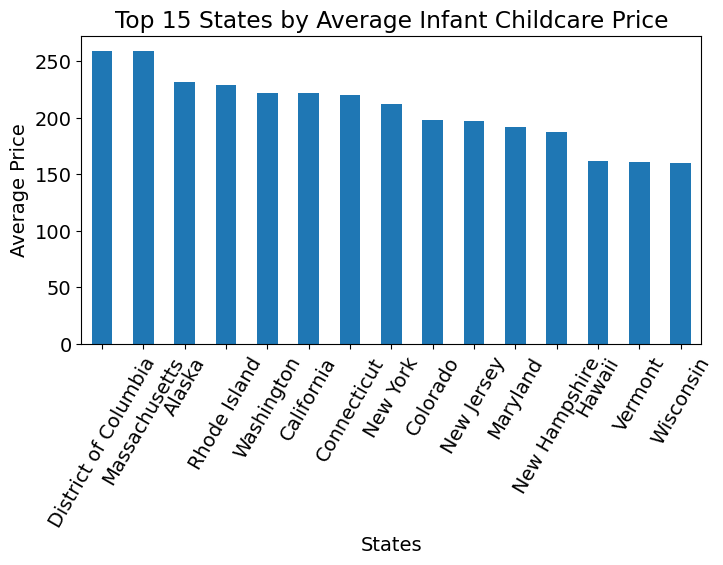

In [26]:
# Calculate average price by state
price_columns = ['MFCCInfant','MCInfant']

# Compute the average price for each state
childcare_df['average_price'] = childcare_df[price_columns].mean(axis=1)

# Group by state and compute the average price
avg_price_by_state = childcare_df.groupby('State_Name')['average_price'].mean()

# Get the top 15 states with the highest average price
top_states = avg_price_by_state.nlargest(15)

# Plot the results
top_states.plot(kind='bar', figsize=(8, 4))
plt.title('Top 15 States by Average Infant Childcare Price')
plt.xlabel('States')
plt.ylabel('Average Price')
plt.xticks(rotation=60)
# Set font size for title and labels
plt.rcParams.update({'font.size': 8})
plt.show()

Interpretation:
* the chart highlights the significant variation in childcare costs across different states. It shows that some states, particularly those in the Northeast and West Coast, have significantly higher childcare costs compared to others.

### Handle Missing Data
Identify and address missing data to ensure clean analysis.

In [27]:
# Identify missing values
print(childcare_df.isnull().sum())

State_Name                           0
State_Abbreviation                   0
County_Name                          0
County_FIPS_Code                     0
StudyYear                            0
                                 ...  
_75FCCPreschool                  11184
_75FCCPreschool_flag             11184
Center_Infant_Cost_Percentage    10974
Fam_Infant_Cost_Percentage       11184
average_price                    10933
Length: 230, dtype: int64


In [28]:
# Separate numeric and categorical columns
numeric_cols = childcare_df.select_dtypes(include='number').columns
categorical_cols = childcare_df.select_dtypes(exclude='number').columns

# Impute numeric columns with mean 
numeric_imputer = SimpleImputer(strategy='mean')
childcare_df[numeric_cols] = numeric_imputer.fit_transform(childcare_df[numeric_cols])

# Impute categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
childcare_df[categorical_cols] = categorical_imputer.fit_transform(childcare_df[categorical_cols])

In [29]:
# Identify missing values
print(childcare_df.isnull().sum())

State_Name                       0
State_Abbreviation               0
County_Name                      0
County_FIPS_Code                 0
StudyYear                        0
                                ..
_75FCCPreschool                  0
_75FCCPreschool_flag             0
Center_Infant_Cost_Percentage    0
Fam_Infant_Cost_Percentage       0
average_price                    0
Length: 230, dtype: int64


In [30]:
childcare_df.columns

Index(['State_Name', 'State_Abbreviation', 'County_Name', 'County_FIPS_Code',
       'StudyYear', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64',
       'FUNR_20to64',
       ...
       'MFCCPreschool_flag', '_75FCCInfant', '_75FCCInfant_flag',
       '_75FCCToddler', '_75FCCToddler_flag', '_75FCCPreschool',
       '_75FCCPreschool_flag', 'Center_Infant_Cost_Percentage',
       'Fam_Infant_Cost_Percentage', 'average_price'],
      dtype='object', length=230)

### Cost Analysis by Demograpy
Compute cost of childcare by Race

In [31]:
# Select demographic columns and income levels
dem_selected_cols = ['State_Name', 'County_Name',
    'OneRace_W', 'OneRace_B', 'OneRace_I', 'OneRace_A',
    'OneRace_H', 'Hispanic', 'MHI', 'FME', 'MME', 
    'MFCCInfant','MCInfant'
]

dem_selected_df = childcare_df[dem_selected_cols]
dem_selected_df.head()

State_Name     County_Name  OneRace_W  OneRace_B  OneRace_I  OneRace_A  \
0    Alabama  Autauga County       78.9       17.7        0.4        0.4   
1    Alabama  Autauga County       79.1       17.9        0.4        0.6   
2    Alabama  Autauga County       79.1       17.9        0.3        0.7   
3    Alabama  Autauga County       78.9       18.1        0.2        0.7   
4    Alabama  Autauga County       78.9       18.1        0.3        0.8   

   OneRace_H  Hispanic      MHI      FME      MME  MFCCInfant  MCInfant  
0        0.0       1.8  50837.0  21875.0  36032.0       83.45    104.95  
1        0.0       2.0  51463.0  22951.0  37492.0       87.39    105.11  
2        0.0       2.3  53255.0  23613.0  39789.0       91.33    105.28  
3        0.0       2.4  53899.0  23864.0  40476.0       95.28    105.45  
4        0.0       2.4  53773.0  25425.0  40251.0       99.22    105.61

In [32]:
# Renaming columns
dem_selected_df = dem_selected_df.rename(columns={
    'OneRace_W': 'Whites',
    'OneRace_B': 'African American',
    'OneRace_I': 'Indigenous',
    'OneRace_A': 'Asian',
    'OneRace_H': 'Hawaiian/Pacific Islander'
})

dem_selected_df.head()

State_Name     County_Name  Whites  African American  Indigenous  Asian  \
0    Alabama  Autauga County    78.9              17.7         0.4    0.4   
1    Alabama  Autauga County    79.1              17.9         0.4    0.6   
2    Alabama  Autauga County    79.1              17.9         0.3    0.7   
3    Alabama  Autauga County    78.9              18.1         0.2    0.7   
4    Alabama  Autauga County    78.9              18.1         0.3    0.8   

   Hawaiian/Pacific Islander  Hispanic      MHI      FME      MME  MFCCInfant  \
0                        0.0       1.8  50837.0  21875.0  36032.0       83.45   
1                        0.0       2.0  51463.0  22951.0  37492.0       87.39   
2                        0.0       2.3  53255.0  23613.0  39789.0       91.33   
3                        0.0       2.4  53899.0  23864.0  40476.0       95.28   
4                        0.0       2.4  53773.0  25425.0  40251.0       99.22   

   MCInfant  
0    104.95  
1    105.11  
2    105.28  
3    105.45  
4    105.61

### Racial and Ethnic Distribution

Explore the demographic composition.

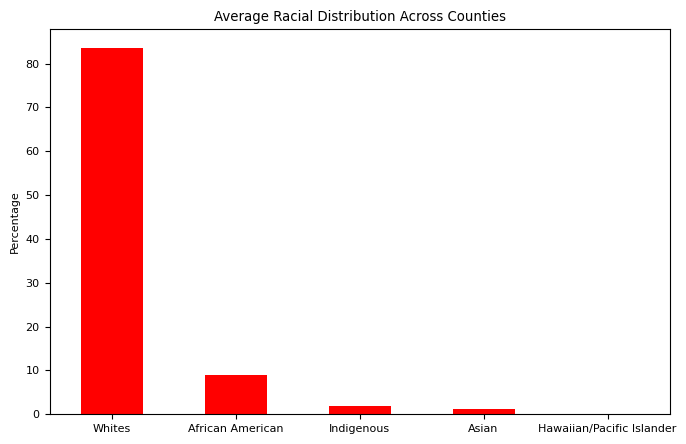

In [33]:
# Sample data plot for racial distribution
race_columns = ['Whites', 'African American', 'Indigenous', 'Asian', 'Hawaiian/Pacific Islander']
dem_selected_df[race_columns].mean().plot(kind='bar', figsize=(8, 5), color='red')
plt.title('Average Racial Distribution Across Counties')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


Interpretation of racial distribution:
* The graph shows a significant dominance of the White population across counties. The bar for Whites is significantly taller than the others, indicating that Whites make up a large majority of the population in most counties.

### Gender Income Gap
Here I computed/analyzed the income disparity between males and females.

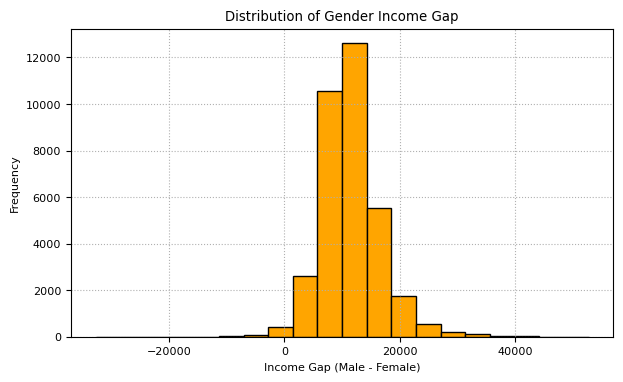

In [34]:
# Calculate gender income gap
dem_selected_df['Income_Gap'] = dem_selected_df['MME'] - dem_selected_df['FME']

# Plot distribution of the income gap
plt.figure(figsize=(7, 4))
dem_selected_df['Income_Gap'].hist(bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Gender Income Gap')
plt.xlabel('Income Gap (Male - Female)')
plt.ylabel('Frequency')
plt.grid(True, linestyle=':')
plt.show()


Intepretation:
* The histogram shows a right skewed distribution, indicating that a majority of the income gaps are positive, meaning males tend to earn more than females.

        MFCCInfant    MCInfant
Gender                        
FME     110.088668  137.185179
MME     113.452800  146.134618


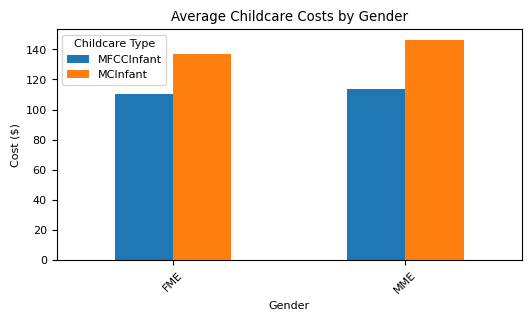

In [35]:
# create columns for Gender income and child care types
gender_income_cols = ['MME','FME']
childcare_cols = ['MFCCInfant', 'MCInfant']
dem_selected_df['Gender'] = dem_selected_df[gender_income_cols].idxmax(axis=1)

# calculate mean childcare costs by gender
childcare_by_gender = dem_selected_df.groupby('Gender')[childcare_cols].mean()
print(childcare_by_gender)

# Plot 
childcare_by_gender.plot(kind='bar', figsize=(6, 3))
plt.title('Average Childcare Costs by Gender')
plt.ylabel('Cost ($)')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.legend(title='Childcare Type')
plt.show()

Interpretation:

* Overall: The graph shows that, on average, males spend more money on childcare compared females across all childcare types.
* Childcare Type: The specific costs vary depending on the type of childcare. We can mention infant care tends to be more expensive than the resut of the groups.

### Correlation Analysis Between Race and Childcare Costs
Here I tried to assess whether racial demographics are associated with variations in childcare costs.

                           MFCCInfant  MCInfant
Whites                       0.010273 -0.007960
African American            -0.118412 -0.117955
Indigenous                  -0.055542 -0.039885
Asian                        0.391828  0.433007
Hawaiian/Pacific Islander    0.058678  0.057248


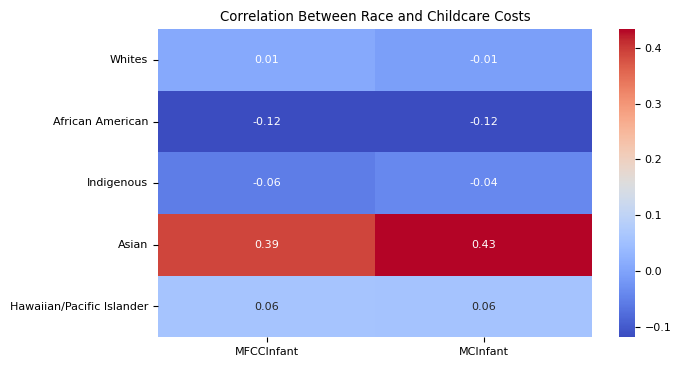

In [36]:
# create columns for race 
race_columns = ['Whites', 'African American', 'Indigenous', 'Asian', 'Hawaiian/Pacific Islander']

# Correlation between race and childcare costs
correlation_matrix = dem_selected_df[race_columns + childcare_cols].corr()

# Extract correlations for childcare costs with race
correlation_race_childcare = correlation_matrix.loc[race_columns, childcare_cols]
print(correlation_race_childcare)

# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_race_childcare, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Race and Childcare Costs')
plt.show()

* Intrepretation: Moderate Positive correlations this indicates a higher proportions of Asians are associated with increased childcare costs.

### Grouping by Racial Groups
Determine average childcare costs for each dominant racial group

                           MFCCInfant    MCInfant
Dominant_Race                                    
African American           100.553749  126.813554
Asian                      132.681757  178.042508
Hawaiian/Pacific Islander  113.421657  146.051770
Indigenous                 101.941089  128.792221
Whites                     114.003547  146.919285


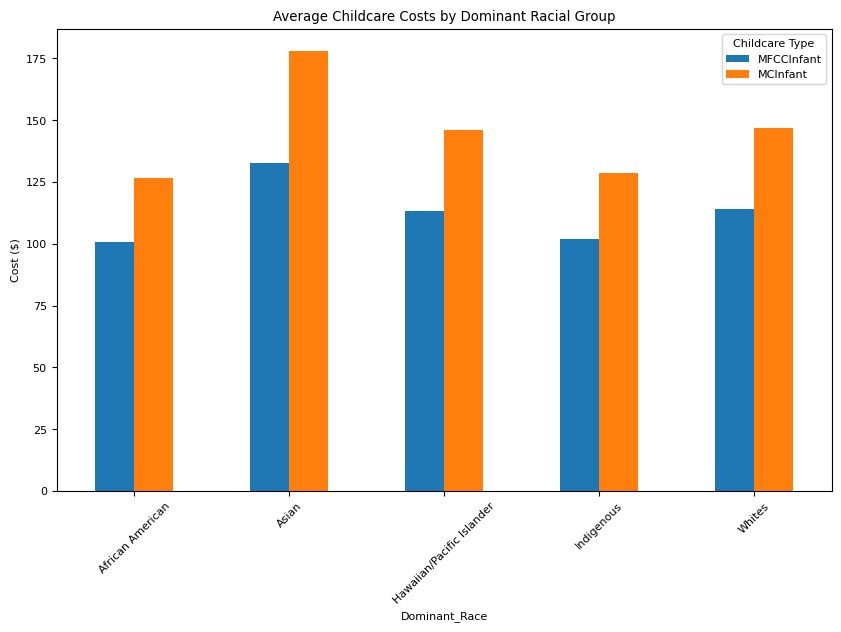

In [37]:
# Add a column for racial group
dem_selected_df['Dominant_Race'] = dem_selected_df[race_columns].idxmax(axis=1)

# calculate mean childcare costs by race
childcare_by_race = dem_selected_df.groupby('Dominant_Race')[childcare_cols].mean()
print(childcare_by_race)

# Plot 
childcare_by_race.plot(kind='bar', figsize=(10, 6))
plt.title('Average Childcare Costs by Dominant Racial Group')
plt.ylabel('Cost ($)')
# plt.xlabel('Racial Group')
plt.xticks(rotation=45)
plt.legend(title='Childcare Type')
plt.show()


* Intepretation: The above graph highlights how childcare costs vary depending on the predominant racial group. Overall, the analysis revealed Asians pay more in Childcare cost compared to other racial groups.

### Childcare cost per county

In [38]:
# Calculate the average childcare cost per county
dem_selected_df['Average_Childcare_Cost'] = dem_selected_df[childcare_cols].mean(axis=1)

# Combine State and County names into one column
dem_selected_df['State_County'] = dem_selected_df['County_Name'] + ', ' + dem_selected_df['State_Name']

# Select columns and sort by Average Childcare Cost
top_counties = (
    dem_selected_df[['State_County', 'Dominant_Race','Average_Childcare_Cost']]
    .sort_values(by='Average_Childcare_Cost', ascending=False)
    .head(10)
)

# Display the top 10 counties
print(top_counties)


                           State_County Dominant_Race  Average_Childcare_Cost
34533             Teton County, Wyoming        Whites                 415.000
31095        Arlington County, Virginia        Whites                 397.500
2462   San Francisco County, California        Whites                 390.275
31094        Arlington County, Virginia        Whites                 380.830
13506     Norfolk County, Massachusetts        Whites                 378.000
13484   Middlesex County, Massachusetts        Whites                 378.000
13483   Middlesex County, Massachusetts        Whites                 377.830
13505     Norfolk County, Massachusetts        Whites                 377.830
13482   Middlesex County, Massachusetts        Whites                 377.670
13504     Norfolk County, Massachusetts        Whites                 377.670


In [39]:
# Calculate the average childcare cost per county
dem_selected_df['Average_Childcare_Cost'] = dem_selected_df[childcare_cols].mean(axis=1)

# Combine State and County names into one column
dem_selected_df['State_County'] = dem_selected_df['County_Name'] + ', ' + dem_selected_df['State_Name']

# Select columns and sort by Average Childcare Cost
top_counties = (
    dem_selected_df[['State_County', 'Average_Childcare_Cost']]
    .sort_values(by='Average_Childcare_Cost', ascending=False)
    .head(10)
)

# Display the top 10 counties
print(top_counties)


                           State_County  Average_Childcare_Cost
34533             Teton County, Wyoming                 415.000
31095        Arlington County, Virginia                 397.500
2462   San Francisco County, California                 390.275
31094        Arlington County, Virginia                 380.830
13506     Norfolk County, Massachusetts                 378.000
13484   Middlesex County, Massachusetts                 378.000
13483   Middlesex County, Massachusetts                 377.830
13505     Norfolk County, Massachusetts                 377.830
13482   Middlesex County, Massachusetts                 377.670
13504     Norfolk County, Massachusetts                 377.670


In [40]:
top_10_counties = top_counties.head(10)
top_10_counties

State_County  Average_Childcare_Cost
34533             Teton County, Wyoming                 415.000
31095        Arlington County, Virginia                 397.500
2462   San Francisco County, California                 390.275
31094        Arlington County, Virginia                 380.830
13506     Norfolk County, Massachusetts                 378.000
13484   Middlesex County, Massachusetts                 378.000
13483   Middlesex County, Massachusetts                 377.830
13505     Norfolk County, Massachusetts                 377.830
13482   Middlesex County, Massachusetts                 377.670
13504     Norfolk County, Massachusetts                 377.670

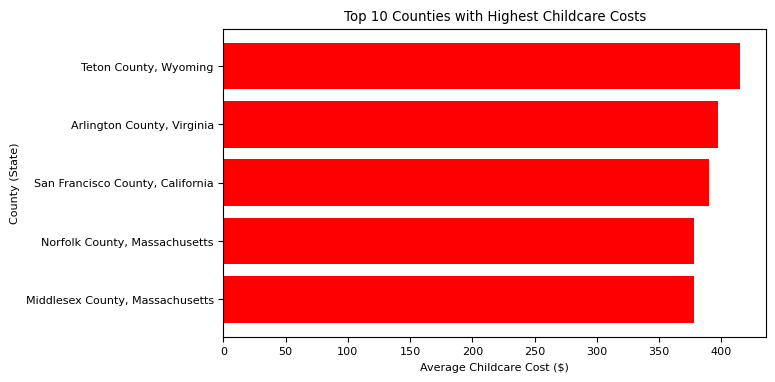

In [41]:
# Bar plot for top counties
plt.figure(figsize=(7, 4))
plt.barh(top_10_counties['State_County'], top_10_counties['Average_Childcare_Cost'], color='red')
plt.title('Top 10 Counties with Highest Childcare Costs')
plt.xlabel('Average Childcare Cost ($)')
plt.ylabel('County (State)')
plt.gca().invert_yaxis()  
plt.show()


##### Interpretation:
* San Francisco County, California: Has the highest average childcare cost among the top 10 counties.
* Middlesex County, Massachusetts: Has the second-highest average childcare cost.
* Norfolk County, Massachusetts: Has the third-highest average childcare cost.

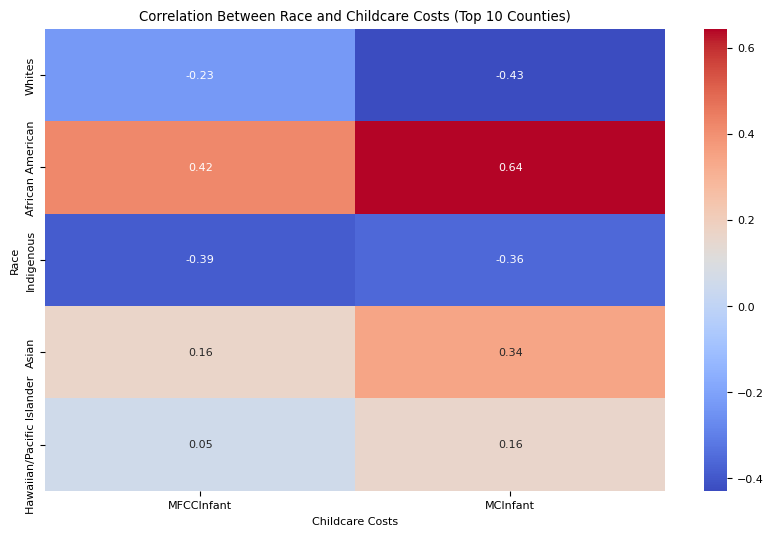

In [42]:
# Filter data for top 10 counties
filtered_df = dem_selected_df[dem_selected_df['State_County'].isin(top_counties['State_County'])]

# Calculate correlation matrix
correlation_matrix = filtered_df[race_columns + childcare_cols].corr()

# Extract correlations for childcare costs with race
correlation_race_childcare = correlation_matrix.loc[race_columns, childcare_cols]

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_race_childcare, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Race and Childcare Costs (Top 10 Counties)')
plt.xlabel('Childcare Costs')
plt.ylabel('Race')
plt.show()


* Intrepretation: Moderate to strong Positive correlations value for African Americans this indicates a higher proportions of of the population in the top 10 counties are  African Americans are associated with increased childcare costs.

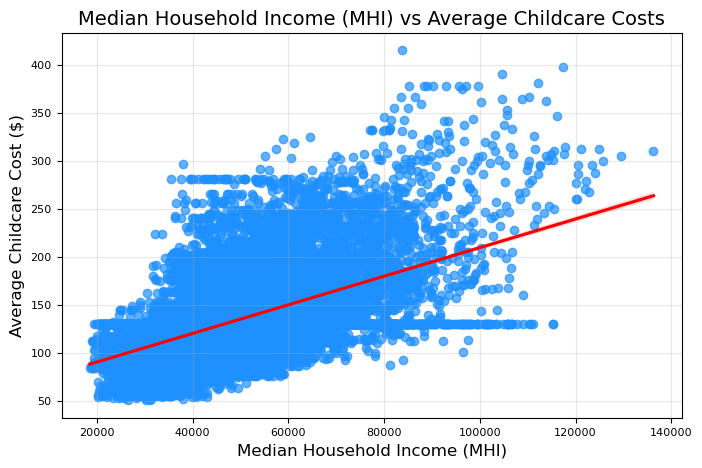

Pearson Correlation Coefficient: 0.53
P-Value: 0.000e+00


In [43]:
# Calculate the average childcare cost per county
dem_selected_df['Average_Childcare_Cost'] = dem_selected_df[childcare_cols].mean(axis=1)

# Scatter plot Median Household Income vs. Average Childcare Cost
plt.figure(figsize=(8, 5))
sns.regplot(
    x='MHI', 
    y='Average_Childcare_Cost', 
    data=dem_selected_df, 
    scatter_kws={'alpha': 0.7, 'color': 'dodgerblue'},  # Transparency for points
    line_kws={'color': 'red'}  # Line color for regression
)

# Add plot title and labels
plt.title('Median Household Income (MHI) vs Average Childcare Costs', fontsize=14)
plt.xlabel('Median Household Income (MHI)', fontsize=12)
plt.ylabel('Average Childcare Cost ($)', fontsize=12)
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

# Calculate the coefficient
correlation, p_value = pearsonr(dem_selected_df['MHI'], dem_selected_df['Average_Childcare_Cost'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-Value: {p_value:.3e}")


Interpretation: 
* The plot indicates an upward trend which indicates a positive relationship. As MHI increases, the average childcare cost also tends to increase. The points are also scattered, suggesting that while there is a general trend, there is also variability in childcare costs within a given income level. Other factors beyond income likely influence childcare costs.
* The red line represents a linear regression line fitted to the data. It shows the general trend and can be used to predict approximate childcare costs based on a given MHI.

In [44]:
# Define the income bins and labels
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, float('inf')]

# Create a new column with the income bins
income_bin_column = pd.cut(childcare_df['MHI'], bins=bins, right=False)

# Concatenate the new column with the original DataFrame
childcare_df = pd.concat([childcare_df, income_bin_column.rename('Income_Bin')], axis=1)

# Display the updated DataFrame
childcare_df.head()

State_Name State_Abbreviation     County_Name  County_FIPS_Code  StudyYear  \
0    Alabama                 AL  Autauga County            1001.0 2008-01-01   
1    Alabama                 AL  Autauga County            1001.0 2009-01-01   
2    Alabama                 AL  Autauga County            1001.0 2010-01-01   
3    Alabama                 AL  Autauga County            1001.0 2011-01-01   
4    Alabama                 AL  Autauga County            1001.0 2012-01-01   

   UNR_16  FUNR_16  MUNR_16  UNR_20to64  FUNR_20to64  ...  _75FCCInfant  \
0    5.42     4.41     6.32         4.6          3.5  ...          97.4   
1    5.93     5.72     6.11         4.8          4.6  ...         102.0   
2    6.21     5.57     6.78         5.1          4.6  ...         106.6   
3    7.55     8.13     7.03         6.2          6.3  ...         111.2   
4    8.60     8.88     8.29         6.7          6.4  ...         115.8   

   _75FCCInfant_flag  _75FCCToddler  _75FCCToddler_flag  _75FCCPreschool  \
0                1.0           97.4                 3.0             95.0   
1                1.0          102.0                 3.0            100.0   
2                1.0          106.6                 3.0            105.0   
3                1.0          111.2                 3.0            110.0   
4                1.0          115.8                 3.0            115.0   

   _75FCCPreschool_flag  Center_Infant_Cost_Percentage  \
0                   1.0                          10.74   
1                   1.0                          10.62   
2                   1.0                          10.28   
3                   1.0                          10.17   
4                   1.0                          10.21   

   Fam_Infant_Cost_Percentage  average_price          Income_Bin  
0                    8.535909         94.200  [40000.0, 60000.0)  
1                    8.830189         96.250  [40000.0, 60000.0)  
2                    8.917773         98.305  [40000.0, 60000.0)  
3                    9.192304        100.365  [40000.0, 60000.0)  
4                    9.594852        102.415  [40000.0, 60000.0)  

[5 rows x 231 columns]

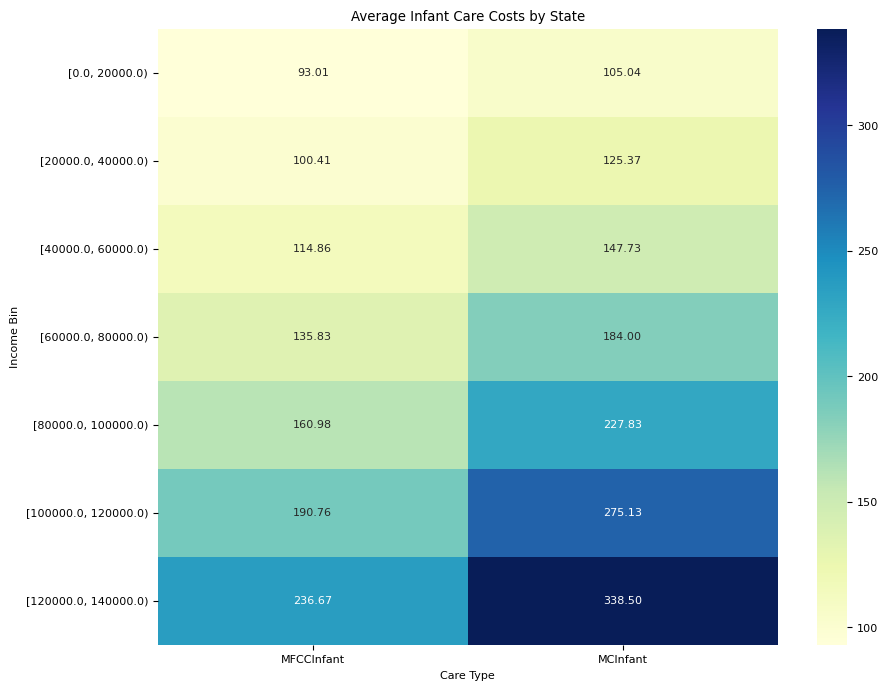

In [45]:
# Group by household income and calculate average costs
MHI_vs_care_cost = childcare_df.groupby('Income_Bin',observed=True)[['MFCCInfant', 'MCInfant']].mean()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(MHI_vs_care_cost, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

plt.title("Average Infant Care Costs by State")
plt.ylabel("Income Bin")
plt.xlabel("Care Type")
plt.show()

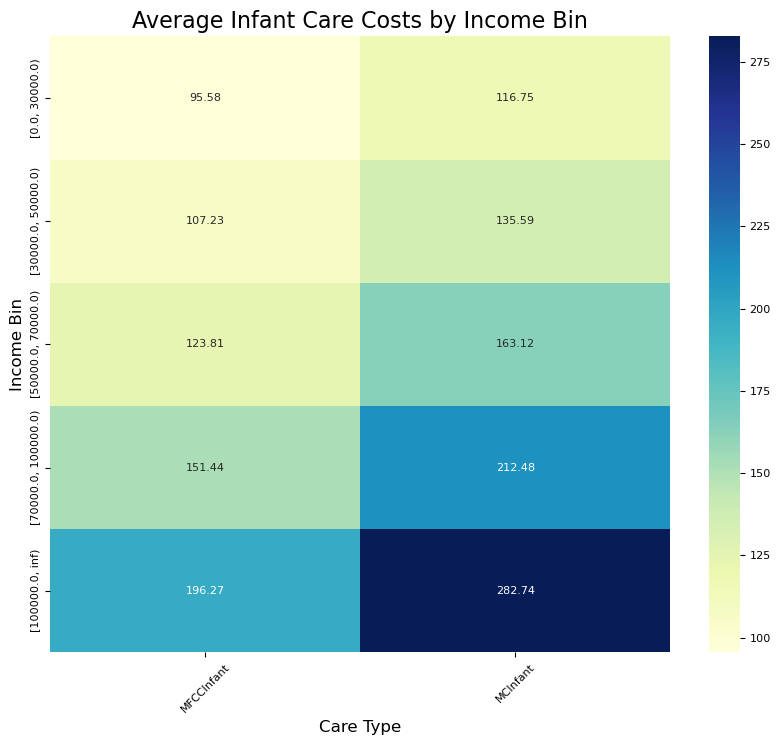

In [46]:
# Ensure Income_Bin is a categorical column
childcare_df['Income_Bin'] = pd.cut(
    childcare_df['MHI'], 
    bins=[0, 30000, 50000, 70000, 100000, float('inf')], 
    # labels=['Low Income', 'Lower-Middle Income', 'Middle Income', 'Upper-Middle Income', 'High Income'],
    right=False
)

# Group by household income bins and calculate average childcare costs
MHI_vs_care_cost = childcare_df.groupby('Income_Bin', observed=True)[['MFCCInfant', 'MCInfant']].mean()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(MHI_vs_care_cost, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)

# Update title and labels
plt.title("Average Infant Care Costs by Income Bin", fontsize=16)
plt.ylabel("Income Bin", fontsize=12)
plt.xlabel("Care Type", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [47]:
print(dem_selected_df.columns)
dem_selected_df.head()

Index(['State_Name', 'County_Name', 'Whites', 'African American', 'Indigenous',
       'Asian', 'Hawaiian/Pacific Islander', 'Hispanic', 'MHI', 'FME', 'MME',
       'MFCCInfant', 'MCInfant', 'Income_Gap', 'Gender', 'Dominant_Race',
       'Average_Childcare_Cost', 'State_County'],
      dtype='object')


State_Name     County_Name  Whites  African American  Indigenous  Asian  \
0    Alabama  Autauga County    78.9              17.7         0.4    0.4   
1    Alabama  Autauga County    79.1              17.9         0.4    0.6   
2    Alabama  Autauga County    79.1              17.9         0.3    0.7   
3    Alabama  Autauga County    78.9              18.1         0.2    0.7   
4    Alabama  Autauga County    78.9              18.1         0.3    0.8   

   Hawaiian/Pacific Islander  Hispanic      MHI      FME      MME  MFCCInfant  \
0                        0.0       1.8  50837.0  21875.0  36032.0       83.45   
1                        0.0       2.0  51463.0  22951.0  37492.0       87.39   
2                        0.0       2.3  53255.0  23613.0  39789.0       91.33   
3                        0.0       2.4  53899.0  23864.0  40476.0       95.28   
4                        0.0       2.4  53773.0  25425.0  40251.0       99.22   

   MCInfant  Income_Gap Gender Dominant_Race  Average_Childcare_Cost  \
0    104.95     14157.0    MME        Whites                  94.200   
1    105.11     14541.0    MME        Whites                  96.250   
2    105.28     16176.0    MME        Whites                  98.305   
3    105.45     16612.0    MME        Whites                 100.365   
4    105.61     14826.0    MME        Whites                 102.415   

              State_County  
0  Autauga County, Alabama  
1  Autauga County, Alabama  
2  Autauga County, Alabama  
3  Autauga County, Alabama  
4  Autauga County, Alabama

In [48]:
# Save as CSV
# dem_selected_df.to_csv('my_dataframe.csv', index=False)

In [49]:
# Select columns and sort by Average Childcare Cost
top_cost_counties = (
    dem_selected_df
    .sort_values(by='Average_Childcare_Cost', ascending=False)
    .head(10)
)

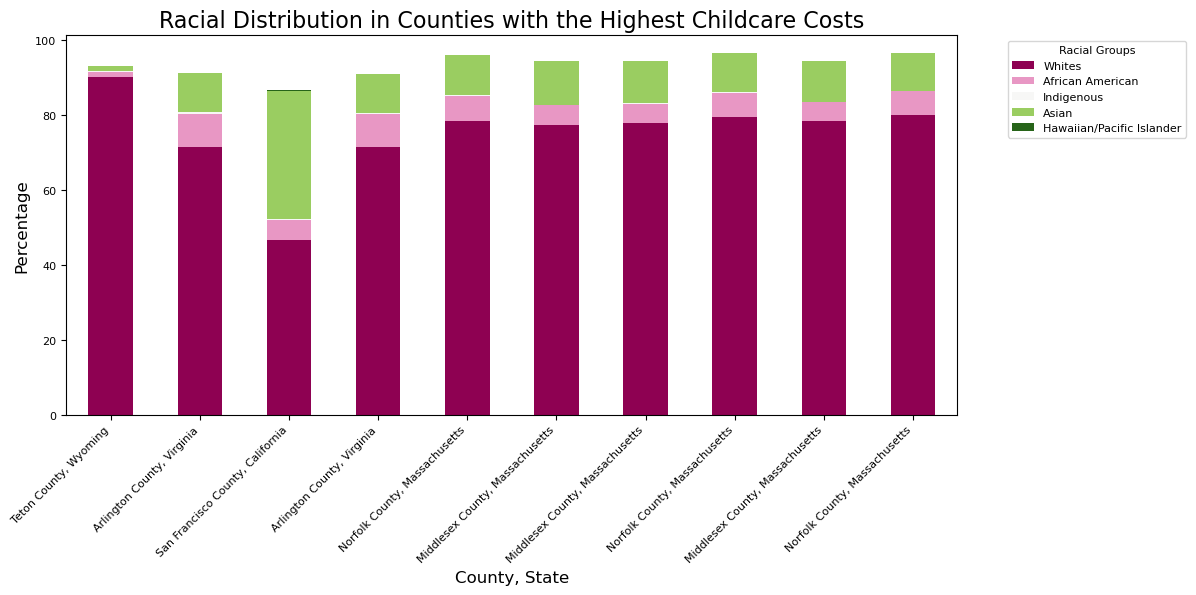

In [50]:
# Select relevant columns for racial distribution
race_columns = ['Whites', 'African American', 'Indigenous', 'Asian', 'Hawaiian/Pacific Islander']
top_race_data = top_cost_counties[['County_Name', 'State_Name'] + race_columns]

# Set county and state name as the index for better labeling
top_race_data = top_race_data.copy()
top_race_data['County_State'] = top_race_data['County_Name'] + ", " + top_race_data['State_Name']
top_race_data.set_index('County_State', inplace=True)

# Plot stacked bar chart
top_race_data[race_columns].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='PiYG'
)

# Add title and labels
plt.title('Racial Distribution in Counties with the Highest Childcare Costs', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('County, State', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Racial Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

In [51]:
# Display colormaps
for cmap_name in plt.colormaps():
    print(cmap_name)

magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
grey
gist_grey
gist_yerg
Grays
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_r
bone_r
brg_r
bwr_r
cool_r
coolwarm_r
copper_r
cu

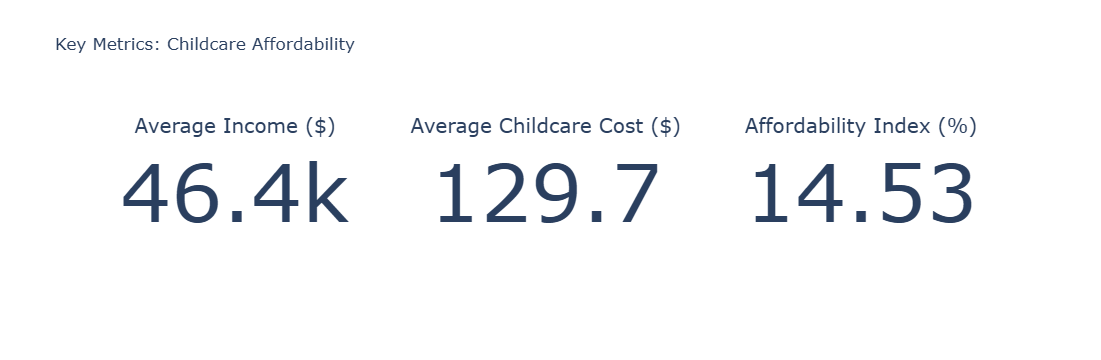

In [52]:
import plotly.graph_objects as go

# Calculate metrics
average_income = childcare_df['MHI'].mean()
average_childcare_cost = childcare_df[['MFCCInfant', 'MCInfant']].mean().mean()
# Calculate the affordability index
affordability_index = (average_childcare_cost * 52 / average_income) * 100

# Create KPI cards using Plotly
fig = go.Figure()

# Add Average Income Card
fig.add_trace(go.Indicator(
    mode="number",
    value=average_income,
    title={"text": "Average Income ($)"},
    domain={'x': [0, 0.33], 'y': [0, 1]}
))

# Add Average Childcare Cost Card
fig.add_trace(go.Indicator(
    mode="number",
    value=average_childcare_cost,
    title={"text": "Average Childcare Cost ($)"},
    domain={'x': [0.33, 0.66], 'y': [0, 1]}
))

# Add Affordability Index Card
fig.add_trace(go.Indicator(
    mode="number",
    value=affordability_index,
    title={"text": "Affordability Index (%)"},
    domain={'x': [0.66, 1], 'y': [0, 1]}
))

# Layout adjustments
fig.update_layout(
    grid={'rows': 1, 'columns': 3, 'pattern': "independent"},
    template='plotly_white',
    title="Key Metrics: Childcare Affordability"
)

# Display the KPI cards
fig.show()


In [53]:
#pip install geopandas matplotlib folium

In [54]:
print(childcare_df.dtypes)

State_Name                               object
State_Abbreviation                       object
County_Name                              object
County_FIPS_Code                        float64
StudyYear                        datetime64[ns]
                                      ...      
_75FCCPreschool_flag                    float64
Center_Infant_Cost_Percentage           float64
Fam_Infant_Cost_Percentage              float64
average_price                           float64
Income_Bin                             category
Length: 231, dtype: object


In [55]:
#pip install geopandas

In [56]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_path = '../dataset/cb_2021_us_state_20m.zip'
extract_dir = '../dataset/cb_2021_us_state_20m/'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")

Files extracted to: ../dataset/cb_2021_us_state_20m/


In [57]:
import geopandas as gpd

# Load the shapefile 
shapefile_path = os.path.join(extract_dir, 'cb_2021_us_state_20m.shp')
gdf = gpd.read_file(shapefile_path)

# Display the first few 
print(gdf.head())


  STATEFP   STATENS     AFFGEOID GEOID STUSPS       NAME LSAD          ALAND  \
0      22  01629543  0400000US22    22     LA  Louisiana   00   111915258185   
1      02  01785533  0400000US02    02     AK     Alaska   00  1478942847588   
2      24  01714934  0400000US24    24     MD   Maryland   00    25151992308   
3      55  01779806  0400000US55    55     WI  Wisconsin   00   140292321657   
4      12  00294478  0400000US12    12     FL    Florida   00   138961722096   

         AWATER                                           geometry  
0   23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...  
1  245378425142  MULTIPOLYGON (((179.48132 51.9753, 179.58286 5...  
2    6979074857  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...  
3   29343646672  MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ...  
4   45972570361  MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ...  


In [58]:
# Merge the shapefile data with your childcare DataFrame 
merged = gdf.set_index('NAME').join(childcare_df.set_index('State_Name'))

# Display the merged data 
print(merged.head())

          STATEFP   STATENS     AFFGEOID GEOID STUSPS LSAD         ALAND  \
NAME                                                                       
Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   
Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   
Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   
Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   
Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   

                AWATER                                           geometry  \
NAME                                                                        
Louisiana  23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...   
Louisiana  23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...   
Louisiana  23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...   
Louisiana  23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...   
Louis

In [59]:
# Create a column for high-cost regions with costs > 20%
merged['High_Cost'] = merged['Center_Infant_Cost_Percentage'] > 20

In [60]:
merged = merged.reset_index()
merged.head()

NAME STATEFP   STATENS     AFFGEOID GEOID STUSPS LSAD         ALAND  \
0  Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   
1  Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   
2  Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   
3  Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   
4  Louisiana      22  01629543  0400000US22    22     LA   00  111915258185   

        AWATER                                           geometry  ...  \
0  23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...  ...   
1  23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...  ...   
2  23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...  ...   
3  23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...  ...   
4  23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...  ...   

  _75FCCInfant_flag _75FCCToddler  _75FCCToddler_flag _75FCCPreschool  \
0               3.0         82.50                 1.0            80.0   
1               3.0         85.00                 1.0            80.0   
2               3.0         85.63                 1.0            85.0   
3               3.0         89.07                 1.0            87.5   
4               3.0         92.50                 1.0            90.0   

   _75FCCPreschool_flag  Center_Infant_Cost_Percentage  \
0                   1.0                          14.14   
1                   1.0                          14.92   
2                   3.0                          13.96   
3                   3.0                          13.92   
4                   1.0                          13.88   

   Fam_Infant_Cost_Percentage  average_price          Income_Bin  High_Cost  
0                   11.922504         87.425  [30000.0, 50000.0)      False  
1                   12.277906         88.605  [30000.0, 50000.0)      False  
2                   11.164488         90.000  [30000.0, 50000.0)      False  
3                   10.956018         90.810  [30000.0, 50000.0)      False  
4                   10.753244         91.615  [30000.0, 50000.0)      False  

[5 rows x 241 columns]

In [61]:
# Create a map centered on the U.S.
# us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# # Add states as polygons to the map
# for _, row in merged.iterrows():
#     color = 'red' if row['High_Cost'] else 'green'
    
#     # Get the state boundaries as GeoJSON from the geometry column
#     geojson = row['geometry']  
    
#     # Add GeoJSON layer to the map with styling
#     folium.GeoJson(
#         geojson,
#         style_function=lambda x: {
#             'fillColor': color,
#             'fillOpacity': 0.6,
#             'weight': 1,
#             'color': 'black'
#         },
#         tooltip=f"State: {row['NAME']}, Cost: {row['Center_Infant_Cost_Percentage']}%"
#     ).add_to(us_map)

# Save the map to an HTML file
# us_map.save('us_childcare_cost_map.html')

# Display the map inline
# display(us_map)

In [62]:
# import folium
# from folium import GeoJson, GeoJsonTooltip
# from IPython.display import display

# # Convert Interval and Timestamp columns to strings
# for col in merged.select_dtypes(include=['interval', 'datetime64[ns]']).columns:
#     merged[col] = merged[col].astype(str)

# # Convert to GeoJSON
# geojson_data = merged.to_json()

# # Create the map
# us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# # Add the choropleth layer
# folium.Choropleth(
#     geo_data=geojson_data,
#     data=merged,
#     columns=['NAME', 'Center_Infant_Cost_Percentage'],
#     key_on='feature.properties.NAME',
#     fill_color='YlOrRd',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Infant Childcare Cost as % of Median Income',
# ).add_to(us_map)

# # Add GeoJSON layer with tooltips
# folium.GeoJson(
#     geojson_data,
#     tooltip=GeoJsonTooltip(
#         fields=['NAME', 'Center_Infant_Cost_Percentage'],
#         aliases=['County:', 'Cost (% of Income):'],
#         localize=True,
#     ),
# ).add_to(us_map)

# # Display the map inline
# display(us_map)

In [63]:
# List columns with Interval data type
interval_columns = merged.select_dtypes(include=['interval']).columns
print("Columns with Interval data type:", interval_columns)

Columns with Interval data type: Index([], dtype='object')
